#### https://online.stat.psu.edu/stat510/lesson/5

In [1]:
import pandas as pd 
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.metrics import mean_squared_error
from IPython.display import Image
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### 1. Decomposition procedures can decribe the trend and seasonal factors in a time series. More extensive decompositions might also include long-run cycles, holiday effects, day of week effects and so on.

**Basic Structure**<br>
Additive: $x_t$ = Trend + Seasonal + Random <br>
Multiplicative: $x_t$ = Trend * Seasonal * Random

The additive model is useful when the seasonal variation is relatively constant over time; The multiplicatie model is useful when the seasonal variation increases over time.

In [3]:
Image(url="additive_example.gif", width=600, height=600)

In [5]:
Image(url="multiplicative_example.gif", width=600, height=600)

In [14]:
df = pd.read_table("beerprod.dat", sep='   ', header=None)

In [16]:
beerprod = df.values.flatten()

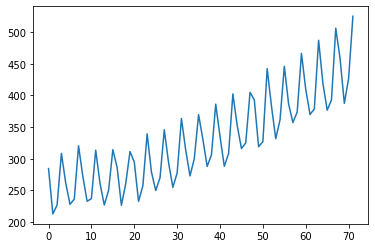

In [17]:
plt.plot(beerprod)

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

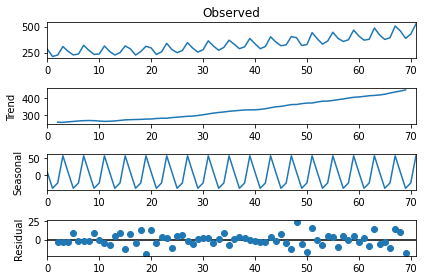

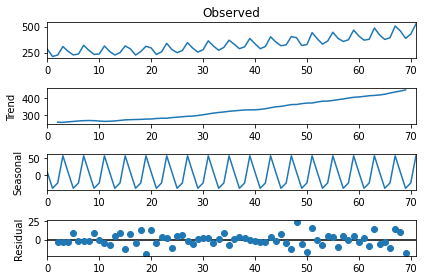

In [24]:
model = seasonal_decompose(x=beerprod, model='additive', period=4)
model.plot()

In [29]:
model.seasonal.reshape((-1,4))

array([[  7.89632353, -40.67867647, -24.65073529,  57.43308824],
       [  7.89632353, -40.67867647, -24.65073529,  57.43308824],
       [  7.89632353, -40.67867647, -24.65073529,  57.43308824],
       [  7.89632353, -40.67867647, -24.65073529,  57.43308824],
       [  7.89632353, -40.67867647, -24.65073529,  57.43308824],
       [  7.89632353, -40.67867647, -24.65073529,  57.43308824],
       [  7.89632353, -40.67867647, -24.65073529,  57.43308824],
       [  7.89632353, -40.67867647, -24.65073529,  57.43308824],
       [  7.89632353, -40.67867647, -24.65073529,  57.43308824],
       [  7.89632353, -40.67867647, -24.65073529,  57.43308824],
       [  7.89632353, -40.67867647, -24.65073529,  57.43308824],
       [  7.89632353, -40.67867647, -24.65073529,  57.43308824],
       [  7.89632353, -40.67867647, -24.65073529,  57.43308824],
       [  7.89632353, -40.67867647, -24.65073529,  57.43308824],
       [  7.89632353, -40.67867647, -24.65073529,  57.43308824],
       [  7.89632353, -40

In [28]:
model.trend.reshape((-1,4))

array([[     nan,      nan, 255.325 , 254.4125],
       [257.45  , 260.1   , 262.8375, 264.6875],
       [265.4125, 264.65  , 262.4625, 260.4   ],
       [261.2625, 262.9875, 266.1875, 269.2375],
       [270.5125, 271.4625, 272.175 , 274.0125],
       [274.375 , 277.45  , 278.975 , 279.175 ],
       [282.9   , 285.2875, 287.9375, 290.3875],
       [291.9625, 295.1375, 299.8   , 304.5125],
       [309.6   , 313.1875, 316.125 , 320.175 ],
       [322.775 , 325.575 , 328.2   , 328.775 ],
       [329.1   , 331.425 , 335.65  , 341.3625],
       [346.95  , 349.3375, 354.675 , 360.05  ],
       [360.6625, 365.6125, 369.0625, 369.4125],
       [375.3   , 380.05  , 380.9375, 384.575 ],
       [389.3   , 393.3625, 398.775 , 403.225 ],
       [405.425 , 408.65  , 412.45  , 414.5125],
       [417.15  , 421.3125, 428.6   , 434.8375],
       [440.4375, 447.0625,      nan,      nan]])

In [31]:
model.resid.reshape((-1,4))

array([[         nan,          nan,  -3.77426471,  -3.44558824],
       [ -3.34632353,   8.47867647,  -2.08676471,  -1.72058824],
       [ -1.40882353,   8.82867647,  -0.81176471,  -4.43308824],
       [ -7.75882353,   4.49117647,   8.36323529, -12.37058824],
       [  7.69117647,  -4.28382353,  12.87573529, -20.04558824],
       [ 12.42867647,  -4.17132353,   2.87573529,   2.59191176],
       [-11.69632353,   5.19117647,   6.51323529,  -2.12058824],
       [ -6.05882353,   0.24117647,   2.35073529,   1.45441176],
       [ -4.09632353,   0.29117647,   8.62573529,  -8.10808824],
       [  0.12867647,   2.90367647,   2.35073529,  -0.10808824],
       [ -1.79632353,  -2.74632353,  -2.69926471,   3.50441176],
       [ -2.04632353,   7.44117647,  -5.12426471, -12.68308824],
       [ 24.44117647,  -6.03382353, -17.41176471,  15.45441176],
       [ -0.09632353,  -7.77132353,   5.11323529,   3.89191176],
       [-10.59632353,   4.51617647,  -0.52426471,   5.54191176],
       [ -3.72132353,   1

#### 2. Smoothing

<ol>
    <li>Moving Average: equal weights, the only param is window size</li>
    <li>Lowess</li>
    <li>Single Exponential: Trend, Equivalent to ARIMA(0,1,1) </li>
    <li>Double Exponential: Trend, Seasonality, Equivalent to ARIMA(0,2,2) </li>
</ol>